First we inpurt numpy, the GP regressor and the linear (dot product) and noise (white) kernel from the scikit learn library.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

This is the generation of the data. the generating function is $f(x)=x+b$, and a Gaussian noise is added with $\sigma=0.4$. The interval is between 0 and 10, and the interval between samples is $\Delta x = \frac{1}{100}$

In [ ]:


N=1001
b=10
sigma=0.4
X = np.linspace(start=0, stop=10, num=N).reshape(-1, 1)
y = np.squeeze(X)+b+sigma*np.random.randn(N)

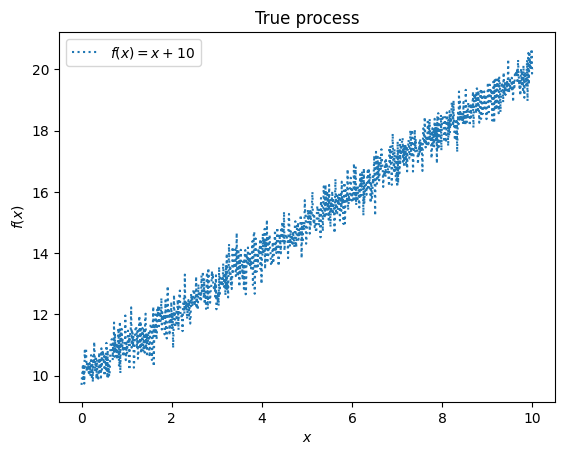

In [ ]:
plt.plot(X, y, label=r"$f(x) = x + $"+str(b), linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("True process")
plt.show()

A set of $M$ samples in the interval $N_1 \leq x \leq N_2$ and the corresponding regressrs $y$ is chosen as the training set.

In [ ]:
rng = np.random.RandomState(20) # Change the random state value in order to obtain a different trainuing dataset
M=10
N1=400
N2=600
training_indices = rng.choice(np.arange(N1,N2), size=M, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

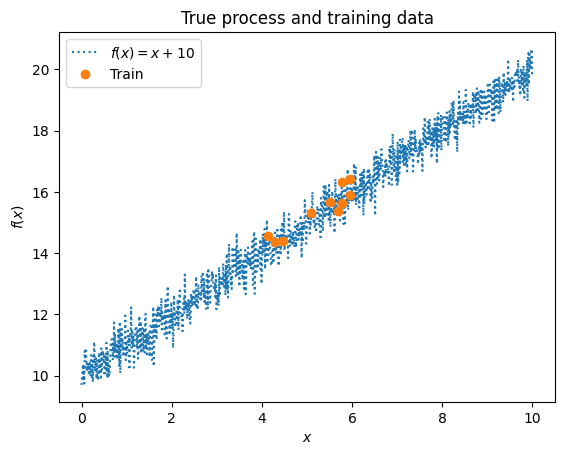

In [ ]:
plt.plot(X, y, label=r"$f(x) = x + $"+str(b), linestyle="dotted")
plt.plot(X_train, y_train,'o', label="Train", )
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("True process and training data")
plt.show()

The kernel is defined as $k(x,x') = \sigma_1^2 x^\top x' + \sigma_0^2 + \sigma^2 \delta(x-x')$. The initial values for these parameters are chosen as
$$
\sigma_1^2 =1~~~~\text{(Amplitude parameter)}\\
\sigma_0^2=0.1~~~~\text{(Bias parameter)}\\
\sigma^2 =0.1 ~~~~\text{(Noise parameter)}
$$

In [ ]:

kernel = 1*DotProduct(0.1) + WhiteKernel(0.1)

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

0.969**2 * DotProduct(sigma_0=10.7) + WhiteKernel(noise_level=0.0919)

Withe the above initialization, the optimized parameters are $\sigma_1^2 \approx 1$,  $\sigma_0 \approx 9$ and  $\sigma\approx 0.2$. Notice that the values are approximately the right ones even for a small nomber of training data.

In the cell below the representation of the prediction is shown, with the $95\%$ confidence interval.  

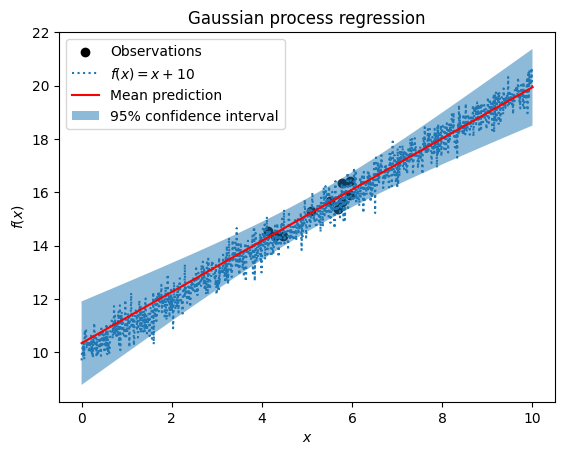

In [ ]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)
plt.scatter(X_train, y_train, label="Observations",color="black")
plt.plot(X, y, label=r"$f(x) = x+$"+str(b), linestyle="dotted")
plt.plot(X, mean_prediction, label="Mean prediction",color="red")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression")
plt.show()